In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [37]:
dataset_root = 'converted_dataset/'
scenario_type = 'low_magnitude_speed'

In [38]:
# load ouput file
with open(dataset_root + scenario_type + '/look_ahead_pt_array.npy', 'rb') as f:
    look_ahead_pt_array = np.load(f, allow_pickle=True)
    
look_ahead_pt_array.shape

(8344, 3)

In [39]:
# load random input file
with open(dataset_root + scenario_type + '/observation_array.npy', 'rb') as f:
    observation = np.load(f, allow_pickle=True)
observation.shape

(8344, 11, 8)

In [40]:
len(observation[0][0])

8

# visualize

In [41]:
# random_idx= random.choice(range(len(observation)))
random_idx = 0
frame = observation[random_idx]
look_ahead_pt = look_ahead_pt_array[random_idx]

In [42]:
ego_pose = frame[0]
objs_pose = frame[1:]
ego_pose

array([ 6.64649706e+05,  3.99925533e+06, -2.04509553e+00, -6.20659121e-04,
       -1.78046777e-03, -2.00584245e-04, -1.40733183e-02,  1.00000000e+00])

In [43]:
objs_pose[:,[0,1,2,3,4]]

array([[ 6.64653783e+05,  3.99925651e+06, -2.07290815e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64649838e+05,  3.99924946e+06, -2.06396917e+00,
        -1.03119088e+00, -2.01086351e+00],
       [ 6.64654334e+05,  3.99925140e+06, -2.05303948e+00,
        -1.69457363e-01, -3.33818029e-01],
       [ 6.64646075e+05,  3.99924807e+06, -2.09939088e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64658364e+05,  3.99925858e+06, -2.03935011e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64654359e+05,  3.99926373e+06, -2.03826927e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64639409e+05,  3.99925761e+06,  1.02700987e+00,
         7.07412341e-01,  1.15767443e+00],
       [ 6.64658496e+05,  3.99926576e+06, -2.03723121e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64648979e+05,  3.99924070e+06, -2.05287484e+00,
        -2.01209583e+00, -3.87127097e+00],
       [ 6.64642615e+05,  3.99924176e+06, -2.04262694e+00,
        -5.21504249e-01

In [44]:
look_ahead_pt

array([6.64647698e+05, 3.99925164e+06, 3.02720850e+00])

In [45]:
ego_pose[4]

-0.0017804677729624917

**!!!ego vx and vy are w.r.t ego coordinate**

In [46]:
ego_vx = ego_pose[3]*np.cos(ego_pose[2]) - ego_pose[4]*np.sin(ego_pose[2])
ego_vy = ego_pose[3]*np.sin(ego_pose[2]) + ego_pose[4]*np.cos(ego_pose[2])

/home/gac/anaconda3/envs/nuplan/lib/python3.9/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/gac/anaconda3/envs/nuplan/lib/python3.9/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


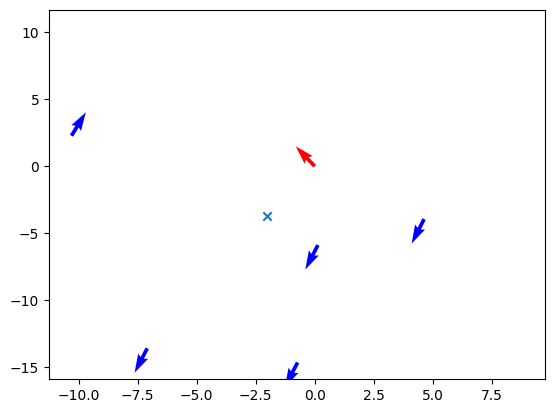

In [47]:
plt.quiver(0, 0, ego_vx, ego_vy, color='r')
plt.scatter(look_ahead_pt[0]-ego_pose[0], look_ahead_pt[1]-ego_pose[1], marker='x')

for obj in objs_pose:
    if obj[-1] == 0:
        continue
    plt.quiver(obj[0]-ego_pose[0], obj[1]-ego_pose[1], obj[3], obj[4], color='b')
    
plt.show()